In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt #used for drawing graphs
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA #to perform PCA to plot the data
from sklearn.model_selection import train_test_split #spliting data into training and testing set
from sklearn.preprocessing import StandardScaler #For Standardization
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
covid_dataset=pd.read_csv(r"/content/covid_data.csv")

In [ ]:
covid_dataset.head()

In [ ]:
covid_dataset.info()

In [ ]:
covid_dataset.shape #We see that there are only 126 samples and 1900+ variables therefore its a HDD problem.

In [ ]:
covid_dataset.dtypes #NEED TO change Sex and Severity to Numeric (Label Encoding)

In [ ]:
covid_dataset['Sex']=pd.factorize(covid_dataset.Sex)[0] #0 starts from index 0.

In [ ]:
covid_dataset['Severity']=pd.factorize(covid_dataset.Severity)[0] #0 starts from index 0.

In [ ]:
covid_dataset.dtypes

In [ ]:
#Dropping Sample column but check for same sample id before doing that.

covid_dataset=covid_dataset.drop(['Sample'], axis=1)

In [ ]:
covid_dataset.head() #0=NonICU and Male #1=ICU and Female

In [ ]:
covid_dataset.isnull().sum() #No NULL Values in the dataset. Every geneome sequence has a value.

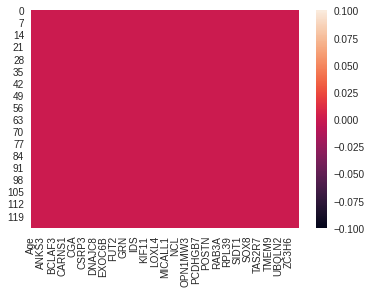

In [ ]:
sns.heatmap(covid_dataset.isnull())

In [ ]:
grouped_df = covid_dataset.groupby(["Age", "Severity"])   #Grouping Age and Severity to visualize data better

for key,item in grouped_df:
  a_group = grouped_df.get_group(key)
  print(a_group, "\n")

In [ ]:
age_group = covid_dataset.groupby('Age') #Gives number of patients in a specific age group
age_group.size()

In [ ]:
covid_group=covid_dataset.groupby(['Age', 'Severity'])
covid_group.size()

Age  Severity
21   1           1
24   0           1
27   0           1
29   0           1
30   0           1
                ..
85   0           1
86   0           1
87   0           1
88   1           1
90   0           2
Length: 76, dtype: int64

In [ ]:
#Split the dataset into x & y
X=covid_dataset.drop('Severity' ,axis=1)
y=covid_dataset['Severity']
print(X.shape)
print(y.shape)

(126, 19474)
(126,)


In [ ]:
#Feature Scaling before PCA. If we dont scale it then accuracy would reduce.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled

In [ ]:
#PCA(Principal Component Analysis) to reduce the number of variables and to find the correlation between the variables.
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #n_components = 10 #0.95 tells PCA to retain 95% useful features and create new dimensions.

X_pca = pca.fit_transform(X_scaled)
X_pca.shape


(126, 50)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=30) #random_state produces same output.

In [ ]:
#Perform Classification Using Decision Tree Classifier

In [ ]:
# Using simple Decision Tree classifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth=6,random_state=0)
decision_tree.fit(X_train, y_train) #Train
decision_tree.score(X_test, y_test) #Make Prediction

y_pred=decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.7380952380952381

In [ ]:
#Creating a confusion matrix
y_pred = decision_tree.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  4],
       [ 7, 15]])

In [ ]:
##Perform Classification Using Random Forest Classifier

In [ ]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test) #85.71% Accuracy Achieved.


0.8571428571428571

In [ ]:
#Perform Classification Using KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test) #Low accuracy


0.6904761904761905

In [ ]:
#Perform Classification Using Linear Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8333333333333334

In [ ]:
#Perform Classification Using SVM Classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.8095238095238095

In [ ]:
#Accuracy reduces after you cross validate
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

0.7903846153846155

In [ ]:
#HyperParameter Tuning using GridSearchCV
#Number of trees in Random forest
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstap=[True,False]

In [ ]:
#Creating the Paramter grid
random_grid={'n_estimators':n_estimators, 'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstap}
print(random_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_Model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=random_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
rf_Grid.best_score_

0.8333333333333334

In [ ]:
print(f'Train Accuracy-:{rf_Grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy-:{rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy-:0.976
Test Accuracy-:0.810


In [ ]:
# Estimate bias and variance
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(rf_Grid, X_train, y_train, X_test, y_test,
                                      loss='mse', num_rounds=200, random_seed=1)

In [ ]:
#Build Random Forest with Hyperparameters
#Number of trees in Random forest
n_estimators=[int(x) for x in np.linspace(start=10,stop=80,num=10)]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstap=[True,False]

In [ ]:
#Creating the Paramter grid
random_grid={'n_estimators':n_estimators, 'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstap}
print(random_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_Model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_Model,param_grid=random_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [ ]:
print(f'Train Accuracy-:{rf_Grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy-:{rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy-:1.000
Test Accuracy-:0.810


In [ ]:
#Building a Classification Model using Logistic Regression (can also do Random forest or SVM)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test) #For Accuracy

0.8333333333333334

In [ ]:
pca.explained_variance_ratio_  #First colmn is carrying 56% of useful information, 32% in th second one and so on

array([0.564253  , 0.32903403, 0.03164755, 0.0254408 , 0.01749573,
       0.01237131, 0.00339026, 0.00239726, 0.00210667, 0.00174339])

In [ ]:
pca.n_components_ #Tells you how many columns are achieved.

10

In [ ]:
X_train_pca,X_test_pca,y_train,y_test =train_test_split(X_pca,y,test_size=0.33, random_state=30)

In [ ]:
model=LogisticRegression()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test) #3% Deviation from original accuracy.

0.8095238095238095

In [ ]:
# Use %timeit to measure function calls
def f():
    import time
    time.sleep(3)

%timeit -n1 f()

1 loop, best of 5: 3 s per loop


In [ ]:
# Use %%time to measure evaluation cell the Unix way
%%time

f()

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 2 s
